# Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

The company is looking at prospective properties to buy to enter the market.
The company wants to know:

* Which variables are significant in predicting the price of a house, and
* How well those variables describe the price of a house.

## Business Goal

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### Data understanding and exploration

In [1]:
# importing all the important packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics
import os

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the dataset
data = pd.read_csv("train.csv", encoding = 'utf-8')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#check dataframe for null and datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
#check the details of numberical data
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
# Check percentage of missing data
round((100*data.isnull().sum() / len(data)).sort_values(ascending = False), 2)

PoolQC         99.52
MiscFeature    96.30
Alley          93.77
Fence          80.75
FireplaceQu    47.26
               ...  
ExterQual       0.00
Exterior2nd     0.00
Exterior1st     0.00
RoofMatl        0.00
SalePrice       0.00
Length: 81, dtype: float64

### Data Cleaning

In [6]:
# MiscFeature column has almost 96% null values so we will drop it
data= data.drop('MiscFeature', axis=1)

In [7]:
data['Alley'].fillna('No Alley', inplace=True)#NA in Alley column means No Alley, so we will replace NA by No Alley.
data['MasVnrType'].fillna('None', inplace=True)#NA in MasVnrType column means No Masonry veneer type, so we will replace by None.
data['FireplaceQu'].fillna('No Fireplace', inplace=True)#NA in FireplaceQu column means No Fireplace, so we will replace NA by No Fireplace.
data['PoolQC'].fillna('No Pool', inplace=True)#NA in PoolQC column means No Pool, so we will replace NA by No Pool.
data['Fence'].fillna('No Fence', inplace=True)#NA in Fence column means No Fence, so we will replace NA by No Fence.
data['MasVnrArea'].fillna(0, inplace=True)#NA in MasVnrType column means No Masonry veneer area, so we will replace by 0.
data['LotFrontage'].fillna(0, inplace=True)#NA in LotFrontage column means No Linear feet of street connected to property, so we will replace by 0.

In [8]:
#NA in GarageType,GarageFinish,GarageQual and GarageCond means No Garage, so we will replace NA by No Garage
data['GarageType'].fillna('No Garage', inplace=True)
data['GarageFinish'].fillna('No Garage', inplace=True) 
data['GarageQual'].fillna('No Garage', inplace=True) 
data['GarageCond'].fillna('No Garage', inplace=True)
data['GarageYrBlt'].fillna(2022, inplace=True)

In [9]:
#NA in BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1 and BsmtFinType2 means No Basement, so we will replace NA by No Basement
data['BsmtQual'].fillna('No Basement', inplace=True)
data['BsmtCond'].fillna('No Basement', inplace=True) 
data['BsmtExposure'].fillna('No Basement', inplace=True) 
data['BsmtFinType1'].fillna('No Basement', inplace=True)
data['BsmtFinType2'].fillna('No Basement', inplace=True)

In [10]:
# Check percentage of missing data
round((100*data.isnull().sum() / len(data)).sort_values(ascending = False), 2)

Electrical      0.07
Id              0.00
BedroomAbvGr    0.00
GarageType      0.00
FireplaceQu     0.00
                ... 
MasVnrType      0.00
Exterior2nd     0.00
Exterior1st     0.00
RoofMatl        0.00
SalePrice       0.00
Length: 80, dtype: float64

In [11]:
#converting year to calculation how many years ago house was built/Remodel from 2022
data['YearBuilt'] = 2022 - data['YearBuilt']
data['YearRemodAdd'] = 2022 - data['YearRemodAdd']
data['GarageYrBlt'] = 2022 - data['GarageYrBlt']
data['YrSold'] = 2022 - data['YrSold']

In [12]:
# Dropping ID Column
data = data.drop(['Id'], axis=1)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,No Alley,Reg,Lvl,AllPub,Inside,...,0,0,No Pool,No Fence,0,2,14,WD,Normal,208500
1,20,RL,80.0,9600,Pave,No Alley,Reg,Lvl,AllPub,FR2,...,0,0,No Pool,No Fence,0,5,15,WD,Normal,181500
2,60,RL,68.0,11250,Pave,No Alley,IR1,Lvl,AllPub,Inside,...,0,0,No Pool,No Fence,0,9,14,WD,Normal,223500
3,70,RL,60.0,9550,Pave,No Alley,IR1,Lvl,AllPub,Corner,...,0,0,No Pool,No Fence,0,2,16,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,No Alley,IR1,Lvl,AllPub,FR2,...,0,0,No Pool,No Fence,0,12,14,WD,Normal,250000


In [13]:
data_raw = data.copy

### Outlier Treatment

In [14]:
#Checking for outlier in the numerical columns
data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,57.623288,10516.828082,6.099315,5.575342,50.732192,37.134247,103.117123,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,14.184247,180921.195890
std,42.300571,34.664304,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,0.000000,1300.000000,1.000000,1.000000,12.000000,12.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,12.000000,34900.000000
25%,20.000000,42.000000,7553.500000,5.000000,5.000000,22.000000,18.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,13.000000,129975.000000
50%,50.000000,63.000000,9478.500000,6.000000,5.000000,49.000000,28.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,14.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,68.000000,55.000000,164.250000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,15.000000,214000.000000
90%,120.000000,92.000000,14381.700000,8.000000,7.000000,97.100000,72.000000,335.000000,1065.500000,117.200000,...,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,16.000000,278000.000000
95%,160.000000,104.000000,17401.150000,8.000000,8.000000,106.000000,72.000000,456.000000,1274.000000,396.200000,...,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,16.000000,326100.000000
99%,190.000000,137.410000,37567.640000,10.000000,9.000000,122.820000,72.000000,791.280000,1572.410000,830.380000,...,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,12.000000,16.000000,442567.010000


In [15]:
#defining method to remove outliers
def remove_outliers(x,y):
    q1 = x[y].quantile(0.1)
    q3 = x[y].quantile(0.9)
    value = q3-q1
    lower_value  = q1-1.5*value
    higer_value = q3+1.5*value
    out= x[(x[y]<higer_value) & (x[y]>lower_value)]
    return out

### Exploratory Data Analysis(EDA)

In [16]:
# all numeric (float and int) variables in the dataset
data_numeric = data.select_dtypes(include=['float64', 'int64'])
data_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,19,19,196.0,706,0,...,0,61,0,0,0,0,0,2,14,208500
1,20,80.0,9600,6,8,46,46,0.0,978,0,...,298,0,0,0,0,0,0,5,15,181500
2,60,68.0,11250,7,5,21,20,162.0,486,0,...,0,42,0,0,0,0,0,9,14,223500
3,70,60.0,9550,7,5,107,52,0.0,216,0,...,0,35,272,0,0,0,0,2,16,140000
4,60,84.0,14260,8,5,22,22,350.0,655,0,...,192,84,0,0,0,0,0,12,14,250000


#### Data Visualisation

<AxesSubplot:xlabel='LotArea', ylabel='Density'>

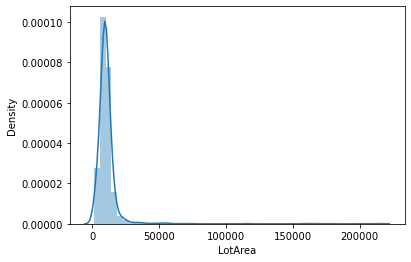

In [17]:
sns.distplot(data['LotArea'])

LotArea is Right skewed, Hence plotting box plot to check outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x24bb3ba1c40>,
 'caps': [<matplotlib.lines.Line2D at 0x24bb3baf3a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x24bb3ba18b0>],
 'medians': [<matplotlib.lines.Line2D at 0x24bb3bafac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x24bb3bafd60>],
 'means': []}

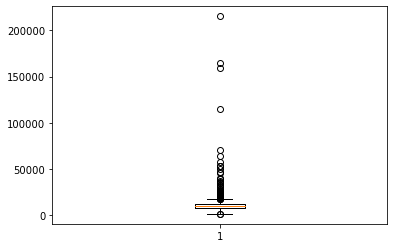

In [18]:
# outlier treatment
plt.boxplot(data['LotArea'])

In [19]:
# Removing outliers from 'LotArea'
data = remove_outliers(data,'LotArea')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10')])

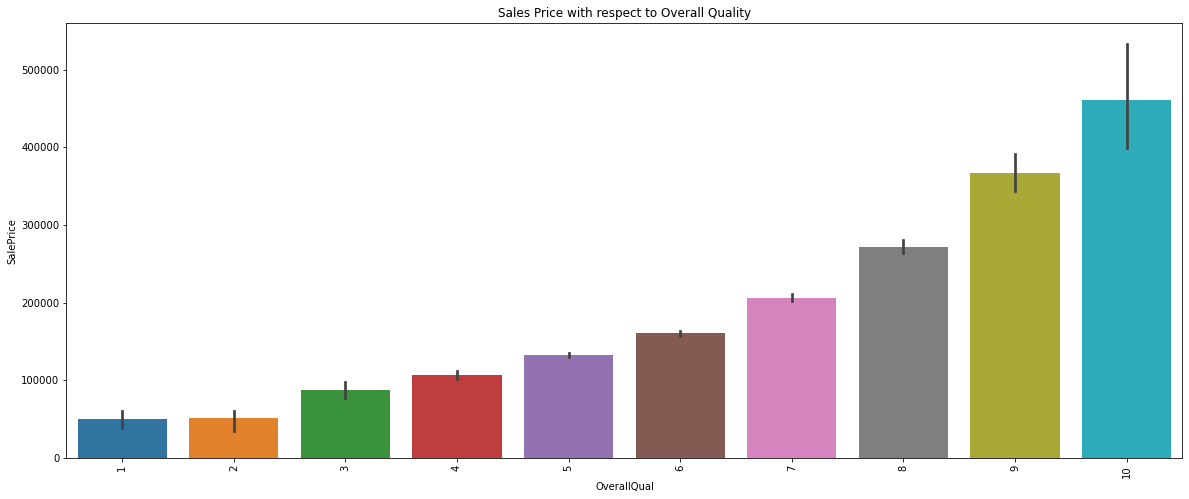

In [20]:
# plot 'overall quality' with respect to 'Saleprice'
plt.figure(figsize=(20, 8))
sns.barplot(x="OverallQual", y="SalePrice", data= data)
plt.title("Sales Price with respect to Overall Quality")
plt.xticks(rotation=90)

Increase in the overall quality has a direct positive impact on the sale price

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'CollgCr'),
  Text(1, 0, 'Veenker'),
  Text(2, 0, 'Crawfor'),
  Text(3, 0, 'NoRidge'),
  Text(4, 0, 'Mitchel'),
  Text(5, 0, 'Somerst'),
  Text(6, 0, 'NWAmes'),
  Text(7, 0, 'OldTown'),
  Text(8, 0, 'BrkSide'),
  Text(9, 0, 'Sawyer'),
  Text(10, 0, 'NridgHt'),
  Text(11, 0, 'NAmes'),
  Text(12, 0, 'SawyerW'),
  Text(13, 0, 'IDOTRR'),
  Text(14, 0, 'MeadowV'),
  Text(15, 0, 'Edwards'),
  Text(16, 0, 'Timber'),
  Text(17, 0, 'Gilbert'),
  Text(18, 0, 'StoneBr'),
  Text(19, 0, 'ClearCr'),
  Text(20, 0, 'NPkVill'),
  Text(21, 0, 'Blmngtn'),
  Text(22, 0, 'BrDale'),
  Text(23, 0, 'SWISU'),
  Text(24, 0, 'Blueste')])

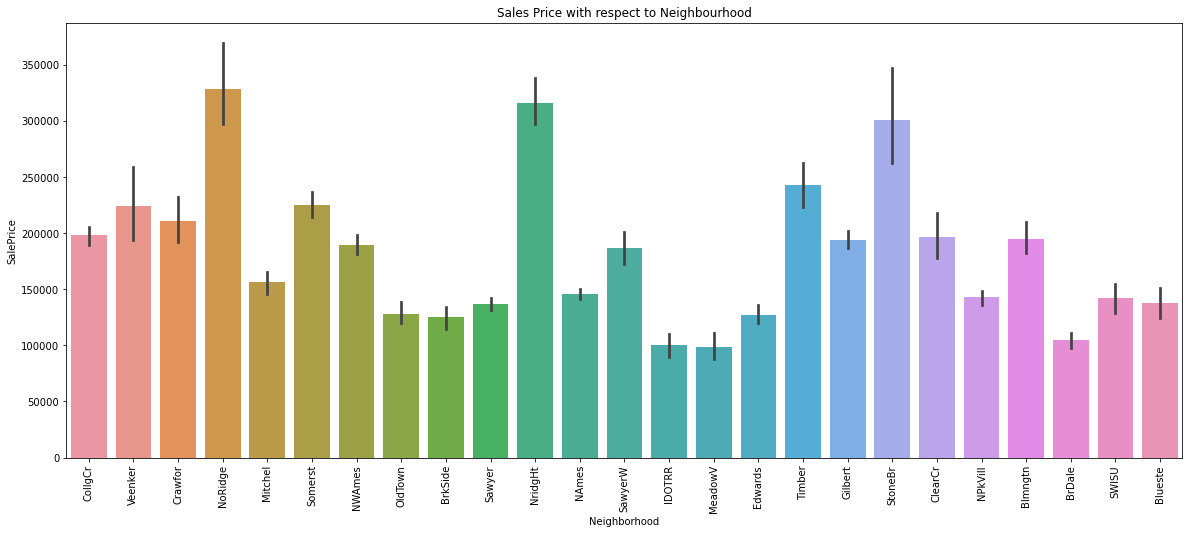

In [21]:
# plot 'Sale Price' with respect to 'Neighborhood'
plt.figure(figsize=(20, 8))
sns.barplot(x="Neighborhood", y="SalePrice", data= data)
plt.title("Sales Price with respect to Neighbourhood")
plt.xticks(rotation=90)

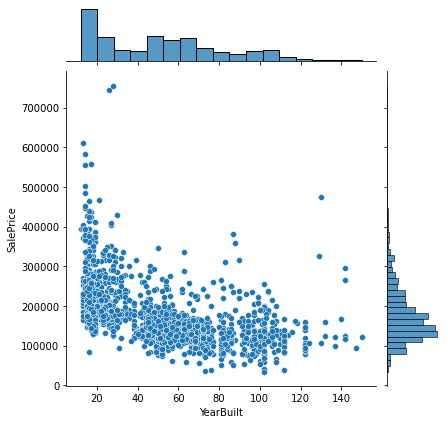

In [22]:
# YearBuilt vs SalePrice
sns.jointplot(x = data['YearBuilt'], y = data['SalePrice'])
plt.show()

Greater the construction date has positive impact on SalePrice

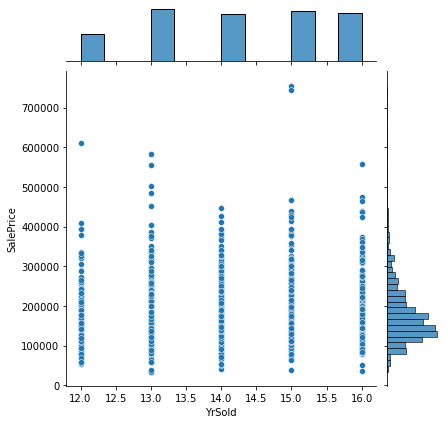

In [23]:
# YearBuilt vs SalePrice
sns.jointplot(x = data['YrSold'], y = data['SalePrice'])
plt.show()

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

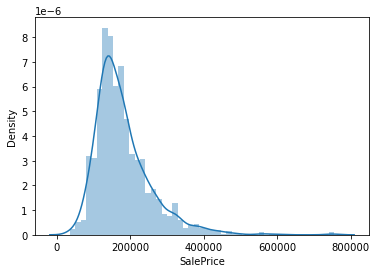

In [24]:
sns.distplot(data['SalePrice'])

Since the Saleprice figures are skewed towards left, we will apply the log transformation to obtain a centralized data

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

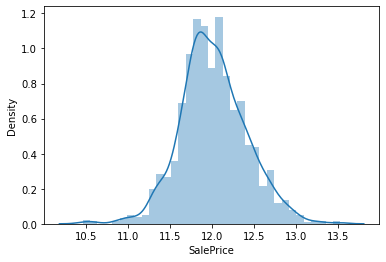

In [25]:
#Log Transformation
data['SalePrice']=np.log1p(data['SalePrice'])
sns.distplot(data['SalePrice'])

In [26]:
# correlation matrix
cor = data_numeric.corr()
cor

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.215023,-0.139781,0.032628,-0.059316,-0.027850,-0.040581,0.023573,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,0.021407,-0.084284
LotFrontage,-0.215023,1.000000,0.100739,0.176561,-0.053457,-0.036853,-0.078686,0.105010,0.076670,-0.009312,...,-0.016780,0.069605,0.027366,0.023499,0.022969,0.114106,-0.059606,0.018942,0.012094,0.209624
LotArea,-0.139781,0.100739,1.000000,0.105806,-0.005636,-0.014228,-0.013788,0.103321,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,0.014261,0.263843
OverallQual,0.032628,0.176561,0.105806,1.000000,-0.091932,-0.572323,-0.550684,0.407252,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,0.027347,0.790982
OverallCond,-0.059316,-0.053457,-0.005636,-0.091932,1.000000,0.375983,-0.073741,-0.125694,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,-0.043950,-0.077856
YearBuilt,-0.027850,-0.036853,-0.014228,-0.572323,0.375983,1.000000,0.592855,-0.311600,-0.249503,0.049107,...,-0.224880,-0.188686,0.387268,-0.031355,0.050364,-0.004950,0.034383,-0.012398,-0.013618,-0.522897
YearRemodAdd,-0.040581,-0.078686,-0.013788,-0.550684,-0.073741,0.592855,1.000000,-0.176529,-0.128451,0.067759,...,-0.205726,-0.226298,0.193919,-0.045286,0.038740,-0.005829,0.010286,-0.021490,0.035743,-0.507101
MasVnrArea,0.023573,0.105010,0.103321,0.407252,-0.125694,-0.311600,-0.176529,1.000000,0.261256,-0.071330,...,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,0.008317,0.472614
BsmtFinSF1,-0.069836,0.076670,0.214103,0.239666,-0.046231,-0.249503,-0.128451,0.261256,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,-0.014359,0.386420
BsmtFinSF2,-0.065649,-0.009312,0.111170,-0.059119,0.040229,0.049107,0.067759,-0.071330,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,-0.031706,-0.011378


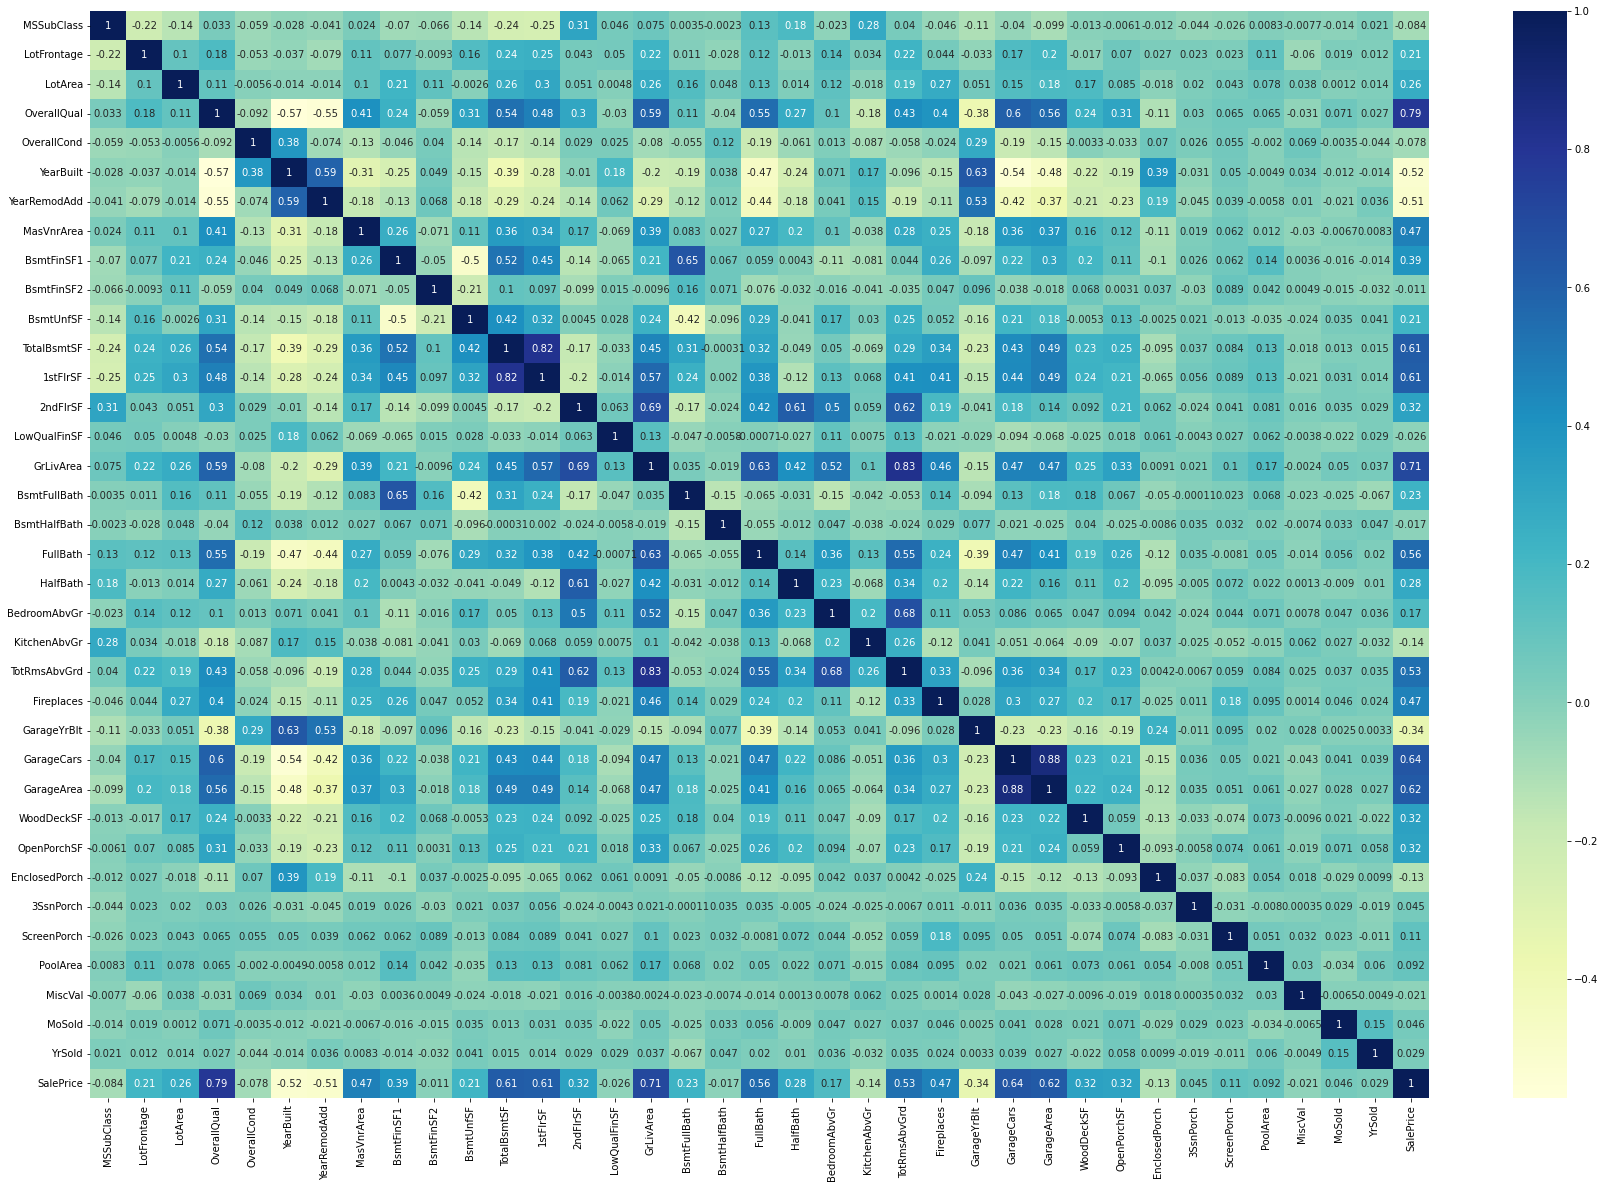

In [27]:
# plotting correlations on a heatmap
# figure size
plt.figure(figsize=(30,20))
# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [28]:
#converting from int type to object to treat the variables as categorical variables
data['MSSubClass'] = data['MSSubClass'].astype('object')
data['OverallQual'] = data['OverallQual'].astype('object')
data['OverallCond'] = data['OverallCond'].astype('object')
data['BsmtFullBath'] = data['BsmtFullBath'].astype('object')
data['BsmtHalfBath'] = data['BsmtHalfBath'].astype('object')
data['FullBath'] = data['FullBath'].astype('object')
data['HalfBath'] = data['HalfBath'].astype('object')
data['BedroomAbvGr'] = data['BedroomAbvGr'].astype('object')
data['KitchenAbvGr'] = data['KitchenAbvGr'].astype('object')
data['TotRmsAbvGrd'] = data['TotRmsAbvGrd'].astype('object')
data['Fireplaces'] = data['Fireplaces'].astype('object')
data['GarageCars'] = data['GarageCars'].astype('object')

### Dummy Variables

In [29]:
# Defining the map function for Street
var1 = ['Street']
def binary_map(x):
    return x.map({'Pave': 1, "Grvl": 0})
# Applying the function to the Lead list
data[var1] = data[var1].apply(binary_map)

In [30]:
# Defining the map function for Utilities
var2 =  ['Utilities']
def binary_map(x):
    return x.map({'AllPub': 1, "NoSeWa": 0})
# Applying the function to the Lead list
data[var2] = data[var2].apply(binary_map)

In [31]:
# Defining the map function for CentralAir
var3 =  ['CentralAir']
def binary_map(x):
    return x.map({'Y': 1, "N": 0})
# Applying the function to the Lead list
data[var3] = data[var3].apply(binary_map)

In [32]:
# creating dummy variables for categorical variables
# subset all categorical variables
types = data.dtypes
data_categorical_types = types[types == object]
#Categorical columns
categorical_columns = list(data_categorical_types.index)
print(categorical_columns)

['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'SaleType', 'SaleCondition']


In [33]:
# convert into dummies
#data_dummies = pd.get_dummies(categorical_columns, drop_first=True)
#data_dummies.head()
data = pd.get_dummies(data, drop_first=True )
data.head()

,LotFrontage,LotArea,Street,Utilities,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,1,1,19,19,196.0,706,0,150,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,1,1,46,46,0.0,978,0,284,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,1,1,21,20,162.0,486,0,434,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,1,1,107,52,0.0,216,0,540,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,1,1,22,22,350.0,655,0,490,...,0,0,0,0,1,0,0,0,1,0


In [34]:
X = data.drop(['SalePrice'], axis=1)
X.head()

,LotFrontage,LotArea,Street,Utilities,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,1,1,19,19,196.0,706,0,150,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,1,1,46,46,0.0,978,0,284,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,1,1,21,20,162.0,486,0,434,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,1,1,107,52,0.0,216,0,540,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,1,1,22,22,350.0,655,0,490,...,0,0,0,0,1,0,0,0,1,0


In [35]:
# Putting response variable to y
y = data['SalePrice']
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [36]:
types = X.dtypes
numeric_type = types[(types == 'int64') | (types == float)]
numerical_columns = list(numeric_type.index)
print(numerical_columns)

['LotFrontage', 'LotArea', 'Street', 'Utilities', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[['LotFrontage', 'LotArea', 'Street', 'Utilities', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']] = scaler.fit_transform(X[['LotFrontage', 'LotArea', 'Street', 'Utilities', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']])

In [38]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=50)

### Model Building and Evaluation using Lasso and Ridge Regression

In [40]:
# Checking the dimension of X_train & y_train
print("X_train", X_train.shape)
print("y_train", y_train.shape)

X_train (1005, 310)
y_train (1005,)


### Ridge Regression

In [41]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [42]:
#checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 10.0}
-0.08306973026005304


In [54]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=5]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005995,0.003765,0.002015,0.001265,0.0001,{'alpha': 0.0001},-0.099073,-0.095887,-0.110235,-0.105875,...,-0.100563,0.006687,27,-0.057180,-0.056091,-0.053169,-0.054688,-0.056308,-0.055488,0.001408
1,0.006268,0.007677,0.000000,0.000000,0.001,{'alpha': 0.001},-0.098937,-0.095595,-0.110164,-0.105775,...,-0.100434,0.006710,26,-0.057183,-0.056096,-0.053176,-0.054692,-0.056320,-0.055494,0.001408
2,0.008321,0.008739,0.000438,0.000877,0.01,{'alpha': 0.01},-0.097802,-0.093281,-0.109484,-0.104890,...,-0.099466,0.006759,24,-0.057214,-0.056157,-0.053243,-0.054729,-0.056422,-0.055553,0.001407
3,0.010793,0.006351,0.001637,0.002013,0.05,{'alpha': 0.05},-0.094435,-0.090449,-0.107025,-0.102008,...,-0.097383,0.006170,23,-0.057385,-0.056468,-0.053600,-0.054876,-0.056797,-0.055825,0.001389
4,0.006249,0.007654,0.003125,0.006249,0.1,{'alpha': 0.1},-0.091924,-0.089262,-0.104746,-0.099586,...,-0.095798,0.005614,22,-0.057680,-0.056737,-0.054066,-0.055102,-0.057145,-0.056146,0.001350


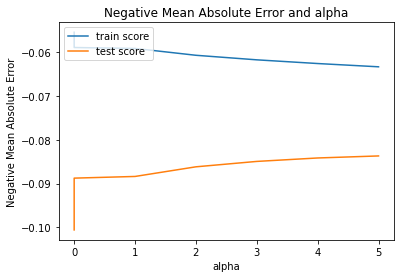

In [55]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

From the above graph and the bestparam score we got optimum lambda to be 2

In [56]:
alpha = 2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 3.44906486e-03,  1.75412584e-02,  6.94506197e-03,  3.07773219e-03,
       -6.65904122e-02, -2.27948504e-02,  1.60775488e-03,  3.52459095e-02,
        8.41678870e-03,  5.73982125e-04,  4.04019924e-02,  1.36239200e-02,
        3.34754415e-02,  5.48321560e-02,  1.78044692e-03,  7.18909330e-02,
        6.20153900e-03,  2.31959296e-02,  1.04999628e-02,  1.07949619e-02,
        6.46480283e-03,  3.85751387e-03,  1.39893247e-02,  8.59173225e-03,
        1.52960003e-03, -5.98458790e-04,  1.74926849e-03, -2.17497505e-02,
       -2.97371924e-02, -3.30191369e-02, -1.06562569e-02, -2.91422049e-02,
        2.76046745e-02,  4.82173023e-02, -1.11944867e-02, -3.31648256e-02,
       -1.40244602e-02,  1.82988667e-02, -7.79364725e-02, -2.67088664e-02,
        1.91167898e-02,  1.73219231e-01,  1.46864382e-01,  1.57443807e-01,
        1.25886598e-01, -5.49729900e-03,  4.07227605e-03,  1.18550150e-02,
        7.72538045e-03,  3.04338364e-04, -8.40065635e-03, -3.63925170e-02,
       -1.02732486e-02,  

In [58]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.691),
 ('LotFrontage', 0.003),
 ('LotArea', 0.018),
 ('Street', 0.007),
 ('Utilities', 0.003),
 ('YearBuilt', -0.067),
 ('YearRemodAdd', -0.023),
 ('MasVnrArea', 0.002),
 ('BsmtFinSF1', 0.035),
 ('BsmtFinSF2', 0.008),
 ('BsmtUnfSF', 0.001),
 ('TotalBsmtSF', 0.04),
 ('CentralAir', 0.014),
 ('1stFlrSF', 0.033),
 ('2ndFlrSF', 0.055),
 ('LowQualFinSF', 0.002),
 ('GrLivArea', 0.072),
 ('GarageYrBlt', 0.006),
 ('GarageArea', 0.023),
 ('WoodDeckSF', 0.01),
 ('OpenPorchSF', 0.011),
 ('EnclosedPorch', 0.006),
 ('3SsnPorch', 0.004),
 ('ScreenPorch', 0.014),
 ('PoolArea', 0.009),
 ('MiscVal', 0.002),
 ('MoSold', -0.001),
 ('YrSold', 0.002),
 ('MSSubClass_30', -0.022),
 ('MSSubClass_40', -0.03),
 ('MSSubClass_45', -0.033),
 ('MSSubClass_50', -0.011),
 ('MSSubClass_60', -0.029),
 ('MSSubClass_70', 0.028),
 ('MSSubClass_75', 0.048),
 ('MSSubClass_80', -0.011),
 ('MSSubClass_85', -0.033),
 ('MSSubClass_90', -0.014),
 ('MSSubClass_120', 0.018),
 ('MSSubClass_160', -0.078),
 ('MSSubCla

In [64]:
#lets predict the R-squared value of test and train data
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9456880671434985
0.9305903179768219


In [65]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.10717121383970893


### Lasso Regression

In [66]:
# Applying Lasso
lasso = Lasso()
# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [70]:
# cv_results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.078171,0.002723,0.000400,0.000800,0.0001,{'alpha': 0.0001},-0.079898,-0.084753,-0.091962,-0.087806,...,-0.086291,0.003956,2,-0.060810,-0.059304,-0.057787,-0.058123,-0.059963,-0.059197,0.001126
1,0.026026,0.003981,0.002400,0.000488,0.001,{'alpha': 0.001},-0.082442,-0.082526,-0.085804,-0.087132,...,-0.084627,0.001855,1,-0.074511,-0.073806,-0.073152,-0.072728,-0.071840,-0.073208,0.000912
2,0.008222,0.001042,0.002001,0.000007,0.01,{'alpha': 0.01},-0.100503,-0.101375,-0.101975,-0.115843,...,-0.105827,0.005939,3,-0.102704,-0.104406,-0.102563,-0.099744,-0.102208,-0.102325,0.001497
3,0.006280,0.000825,0.001909,0.001009,0.05,{'alpha': 0.05},-0.118247,-0.116165,-0.129100,-0.132698,...,-0.125916,0.007289,4,-0.125099,-0.125862,-0.123553,-0.121305,-0.124095,-0.123983,0.001558
4,0.006516,0.000877,0.002202,0.000399,0.1,{'alpha': 0.1},-0.152444,-0.145784,-0.167439,-0.157813,...,-0.159549,0.010216,5,-0.158830,-0.159117,-0.156458,-0.154243,-0.160775,-0.157885,0.002283


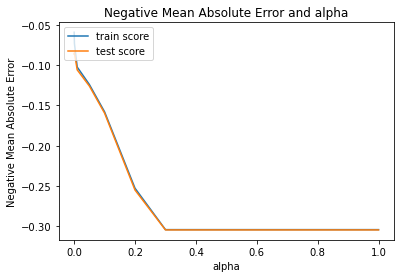

In [71]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

From the above graph we can see that the Negative Mean Absolute Error is quite low at alpha > 0.2 and alpha < 0.4 and stabilises thereafter,but we will choose a low value of alpha to balance the trade-off between Bias-Variance and to get the coefficients of smallest of features.

In [87]:
alpha = 0.01
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)
lasso.coef_

array([ 0.        ,  0.01441609,  0.        ,  0.        , -0.0670001 ,
       -0.06293695,  0.00281698,  0.04447318,  0.        , -0.        ,
        0.05920282,  0.02471693,  0.        ,  0.        , -0.00306514,
        0.15482266,  0.        ,  0.05503989,  0.00118539,  0.00735242,
        0.        ,  0.        ,  0.01100114, -0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        ,  0.        ,  0.        ,
       -0.        , -0.        ,  0.        , -0.        ,  0.        ,
       -0.        ,  0.        ,  0.        , -0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        , -0.  

The advantage of this technique is clearly visible here as Lasso brings the coefficients of insignificant features to zero

In [88]:
# lasso model parameters
model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 12.055),
 ('LotFrontage', 0.0),
 ('LotArea', 0.014),
 ('Street', 0.0),
 ('Utilities', 0.0),
 ('YearBuilt', -0.067),
 ('YearRemodAdd', -0.063),
 ('MasVnrArea', 0.003),
 ('BsmtFinSF1', 0.044),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', 0.059),
 ('CentralAir', 0.025),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', -0.003),
 ('GrLivArea', 0.155),
 ('GarageYrBlt', 0.0),
 ('GarageArea', 0.055),
 ('WoodDeckSF', 0.001),
 ('OpenPorchSF', 0.007),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.011),
 ('PoolArea', -0.0),
 ('MiscVal', 0.0),
 ('MoSold', 0.0),
 ('YrSold', 0.0),
 ('MSSubClass_30', -0.0),
 ('MSSubClass_40', 0.0),
 ('MSSubClass_45', 0.0),
 ('MSSubClass_50', 0.0),
 ('MSSubClass_60', 0.0),
 ('MSSubClass_70', 0.0),
 ('MSSubClass_75', 0.0),
 ('MSSubClass_80', 0.0),
 ('MSSubClass_85', 0.0),
 ('MSSubClass_90', -0.0),
 ('MSSubClass_120', 0.0),
 ('MSSubClass_160', -0.0),
 ('MSSubClass_180', -0.0),
 ('MSSubClass_190', -0.0),
 ('MSZonin

In [89]:
#lets predict the R-squared value of test and train data
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8563356977820001
0.8646949529781695


In [90]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.14963222039583318


* It is visible that the model performance for Ridge Regression is better than Lasso Regression.
* Also, The R2 values for Train and Test matches well, indicating an optimum model

In [91]:
# Creating a dataframe for the coefficients obtained from Lasso
mod = list(zip(cols, model_parameters))

In [94]:
para = pd.DataFrame(mod)
para.columns = ['Variable', 'Coeff']
para = para.sort_values((['Coeff']), axis = 0, ascending = False)
para

,Variable,Coeff
0,constant,12.055
16,GrLivArea,0.155
11,TotalBsmtSF,0.059
18,GarageArea,0.055
8,BsmtFinSF1,0.044
...,...,...
171,ExterQual_TA,-0.017
240,KitchenQual_TA,-0.020
263,FireplaceQu_No Fireplace,-0.039
6,YearRemodAdd,-0.063


In [95]:
# Chose variables whose coefficients are non-zero
pred = pd.DataFrame(para[(para['Coeff'] != 0)])
pred

,Variable,Coeff
0,constant,12.055
16,GrLivArea,0.155
11,TotalBsmtSF,0.059
18,GarageArea,0.055
8,BsmtFinSF1,0.044
12,CentralAir,0.025
262,FireplaceQu_Gd,0.015
2,LotArea,0.014
23,ScreenPorch,0.011
20,OpenPorchSF,0.007


In [97]:
# These 18 variables obtained from Lasso Regression can be concluded to have the strong effect on the SalePrice
pred.shape

(19, 2)

In [98]:
Lassso_var = list(pred['Variable'])
print(Lassso_var)

['constant', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', 'BsmtFinSF1', 'CentralAir', 'FireplaceQu_Gd', 'LotArea', 'ScreenPorch', 'OpenPorchSF', 'MasVnrArea', 'WoodDeckSF', 'LowQualFinSF', 'HeatingQC_TA', 'ExterQual_TA', 'KitchenQual_TA', 'FireplaceQu_No Fireplace', 'YearRemodAdd', 'YearBuilt']


### Inference:

* Though the model performance by Ridge Regression was better in terms of R2 values of Train and Test,
* It is better to use Lasso Regression as it brings and assigns a zero value to insignificant features, helping us to choose the predictive variables.
* It is always advisable to use simple yet robust model.

In [99]:
#Equation formulated using the features and coefficients obtained by Lasso Regression as
pred.set_index(pd.Index(['C','x1', 'x2', 'x3', 'x4', 'x5' , 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16','x17','x18']), inplace = True) 
pred

,Variable,Coeff
C,constant,12.055
x1,GrLivArea,0.155
x2,TotalBsmtSF,0.059
x3,GarageArea,0.055
x4,BsmtFinSF1,0.044
x5,CentralAir,0.025
x6,FireplaceQu_Gd,0.015
x7,LotArea,0.014
x8,ScreenPorch,0.011
x9,OpenPorchSF,0.007


* These 18 feature are final features as per Lasso Regression that can be used for predicting the price of house

Hence the equation can be written as:

Log(Y) = C + 0.155(x1) + 0.059(x2) + 0.055(x3) + 0.044(x4) + 0.025(x5) + 0.015(x6) + 0.014(x7) + 0.011(x8) + 0.007(x9) + 0.003(x10) + 0.001(x11) - 0.003(x12) - 0.011(x13) - 0.017(x14) - 0.020(x15) - 0.039(x16) - 0.063(x17) - 0.067(x18) + Error term(RSS + alpha * (sum of absolute value of coefficients))

### Observation:

* Suggestions for Surprise Housing is to keep eye on these predictors which is affecting the price of the house.
* When the market value of the property is lower than the Predicted Sale Price, its the time to buy.